# Customer Churn Prediction DataSC project

## Introduction

In this project for DataSC, we focus on aiming to predict customer churn using machine learning techniques.

*Dataset Source: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)*


## 1. Data Loading

Importing necessary libararies:

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Exploration

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [192]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [193]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3. EDA

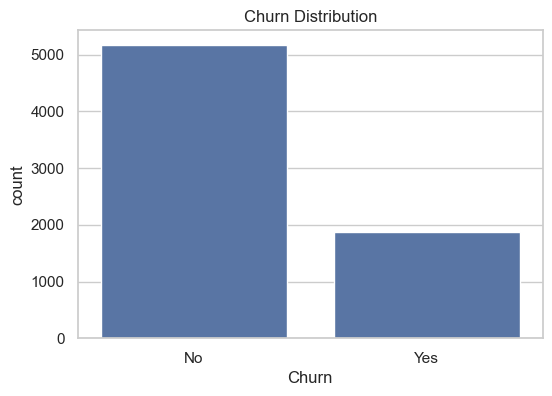

In [194]:
sns.set(style='whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

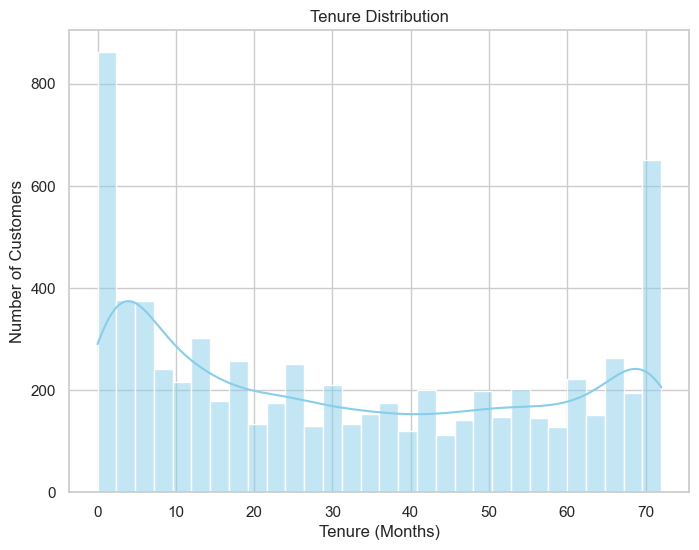

In [195]:
plt.figure(figsize=(8,6))
sns.histplot(df['tenure'],bins=30, kde=True, color='skyblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


## 4. Data Preprocessing/Feature Engineering

In [196]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

binary_cols  = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols: 
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

In [197]:
multi_cat_cols = [col for col in categorical_cols if col not in binary_cols]


df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [198]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [199]:
df.dropna(subset=['TotalCharges'], inplace=True)


df.reset_index(drop=True, inplace=True)

### 4.2 Feature Scaling 

In [200]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### 4.3 Feature Engineering

In [201]:
intended_service_cols = [
    'PhoneService',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No', 'InternetService_Satellite',
    'OnlineSecurity_No', 'OnlineSecurity_Yes',
    'OnlineBackup_No', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_Yes',
    'TechSupport_No', 'TechSupport_Yes',
    'StreamingTV_No', 'StreamingTV_Yes',
    'StreamingMovies_No', 'StreamingMovies_Yes'
]

service_cols = [col for col in intended_service_cols if col in df.columns]

missing_cols = [col for col in intended_service_cols if col not in df.columns]

if missing_cols:
    print(f"\nThe following service columns are missing and will be excluded from 'TotalServices':\n{missing_cols}\n")
else:
    print("All intended service columns are present.\n")

print(f"Service columns used for 'TotalServices':\n{service_cols}\n")

df['TotalServices'] = df[service_cols].sum(axis=1)
print("TotalServices feature:")
print(df[['TotalServices']].head())


The following service columns are missing and will be excluded from 'TotalServices':
['InternetService_Satellite', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No']

Service columns used for 'TotalServices':
['PhoneService', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']

TotalServices feature:
  TotalServices
0             2
1             3
2             3
3             4
4             2


In [202]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 Months'
    elif tenure <= 24:
        return '12-24 Months'
    elif tenure <= 36:
        return '24-36 Months'
    elif tenure <= 48:
        return '36-48 Months'
    elif tenure <= 60:
        return '48-60 Months'
    else:
        return '60+ Months'


df['TenureGroup'] = df['tenure'].apply(tenure_group)


df = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)


print("\nTenureGroup encoding:")
print(df.filter(regex='TenureGroup').head())


TenureGroup encoding:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


## 5. Final Data Preparation


In [203]:
df.drop(['customerID'], axis=1, inplace=True)


print("\nDataframe after preprocessing:")
print(df.head())


X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Dataframe after preprocessing:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   
1       1              0        0           0  0.064303             1   
2       1              0        0           0 -1.239504             1   
3       1              0        0           0  0.512486             0   
4       0              0        0           0 -1.239504             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.161694     -0.994194      0  ...   
1                 0       -0.260878     -0.173740      0  ...   
2                 1       -0.363923     -0.959649      1  ...   
3                 0       -0.747850     -0.195248      0  ...   
4                 1        0.196178     -0.940457      1  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   
1                           

## 6. Modeling

In [204]:
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


--- Logistic Regression ---
Logistic Regression Accuracy: 0.8052594171997157

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



### 6.1 Feature Importance of Logistic Regression Model

In [205]:
coefficients = log_reg.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df_sorted[['Feature', 'Coefficient']].head(10))

                           Feature  Coefficient
4                           tenure    -1.358598
26               Contract_Two year    -1.357161
11     InternetService_Fiber optic     1.111055
25               Contract_One year    -0.749054
8                     TotalCharges     0.643023
5                     PhoneService    -0.567581
7                   MonthlyCharges    -0.517231
14              OnlineSecurity_Yes    -0.424512
20                 TechSupport_Yes    -0.382759
28  PaymentMethod_Electronic check     0.382696


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1600\3895333859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')


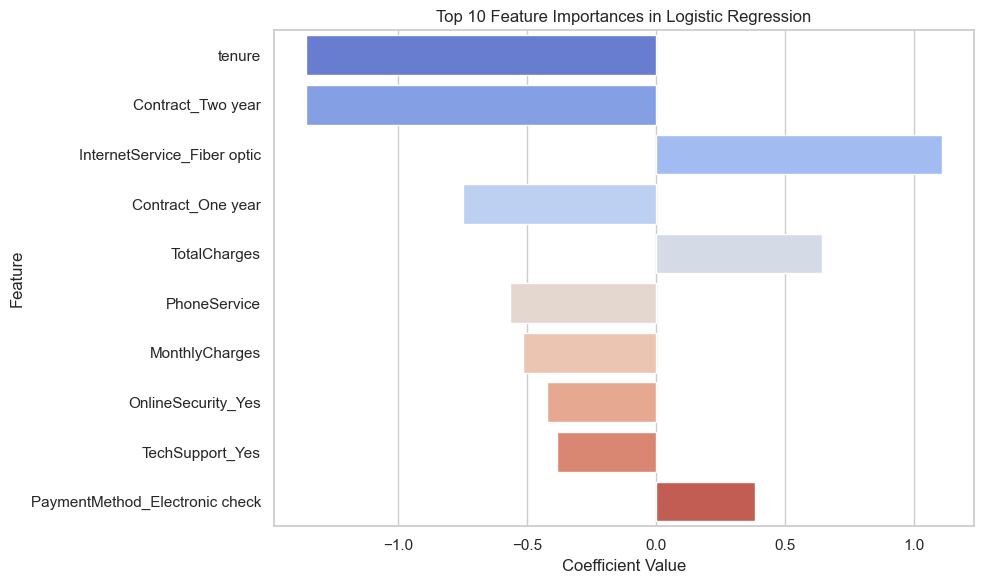

In [206]:
top_features = coef_df_sorted.head(10)
plt.figure(figsize=(10, 6))

sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')

plt.title('Top 10 Feature Importances in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

## 7. Conclusions

So looking at the graph above, features that had a negative coefficient indicated that the feature decreased the likelihood of the customer churning and a positive coefficient indicated that the feature increased the likelihood of churning.


The main feature that was by far the most imporant was the tenure of the customer, therefore the company should implement possibly some type of loyalty program to incentivise reamining at the company.

Furthermore, it seems that internet service, specifically fiber optic, caused customers to churn from the company at a higher rate. More work would need to be done in order to figure out what is causing this.

Lastly, the logistic regression model was able to predict with 80.92% accuracy.